In [1]:
%matplotlib inline


k-means
=======

This example uses $k$-means clustering for time series. Three variants of
the algorithm are available: standard
Euclidean $k$-means, DBA-$k$-means (for DTW Barycenter
Averaging [1])
and Soft-DTW $k$-means [2].

In the figure below, each row corresponds to the result of a different
clustering. In a row, each sub-figure corresponds to a cluster.
It represents the set
of time series from the training set that were assigned to the considered
cluster (in black) as well as the barycenter of the cluster (in red).

A note on pre-processing
~~~~~~~~~~~~~~~~~~~~~~~~

In this example, time series are preprocessed using
`TimeSeriesScalerMeanVariance`. This scaler is such that each output time
series has zero mean and unit variance.
The assumption here is that the range of a given time series is uninformative
and one only wants to compare shapes in an amplitude-invariant manner (when
time series are multivariate, this also rescales all modalities such that there
will not be a single modality responsible for a large part of the variance).
This means that one cannot scale barycenters back to data range because each
time series is scaled independently and there is hence no such thing as an
overall data range.

[1] F. Petitjean, A. Ketterlin & P. Gancarski. A global averaging method for dynamic time warping, with applications to clustering. Pattern Recognition, Elsevier, 2011, Vol. 44, Num. 3, pp. 678-693
[2] M. Cuturi, M. Blondel "Soft-DTW: a Differentiable Loss Function for Time-Series," ICML 2017.


Soft-DTW k-means
0.637 --> 0.458 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

0.458 --> 
[0 0 1 0 1 0 2 0 0 1 1 1 0 0 0 1 2 0 2 1 0 1 2 0 2 1 0 1 1 2 0 2 2 0 1 2 0
 2 0 0 0 0 0 0 0 0 1 0 1 2]


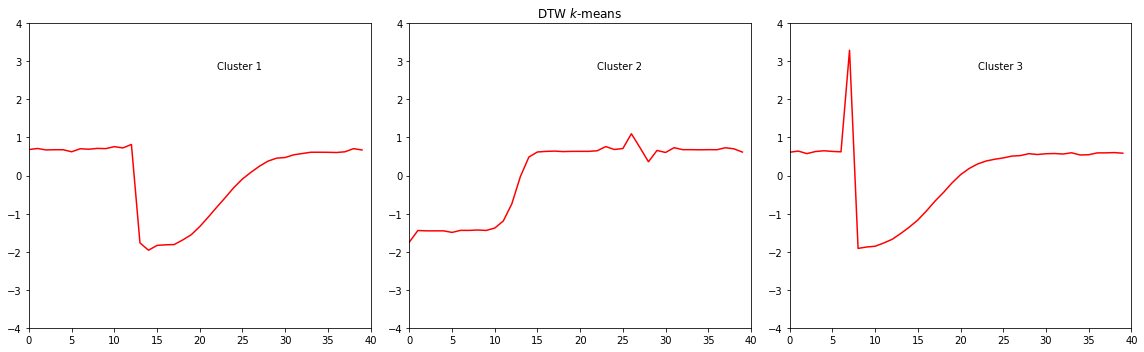

In [18]:
# Author: Romain Tavenard
# License: BSD 3 clause

import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler

seed = 0
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = X_train[y_train < 4]  # Keep first 3 classes
numpy.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])
# Make time series shorter
X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)
sz = X_train.shape[1]


plt.figure(figsize=(16,14))


# DTW-k-means
print("DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=3,
                           metric="dtw",
                           verbose=True,
                           random_state=seed)

y_pred = sdtw_km.fit_predict(X_train)

print(y_pred)

for yi in range(3):
    plt.subplot(3, 3, 7 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DTW $k$-means")

plt.tight_layout()
plt.show()

In [16]:
sdtw_km.cluster_centers_[0].ravel()

array([ 0.68114642,  0.7094705 ,  0.6715618 ,  0.67703447,  0.67642258,
        0.62331864,  0.70256806,  0.68982243,  0.71157632,  0.7063805 ,
        0.75773523,  0.72400941,  0.81527198, -1.77055735, -1.96231285,
       -1.83600844, -1.82029822, -1.81413942, -1.69354215, -1.55610528,
       -1.34186433, -1.09134337, -0.83080799, -0.57732079, -0.31462071,
       -0.0912683 ,  0.08470576,  0.2460494 ,  0.37819135,  0.45545944,
        0.47244797,  0.54346845,  0.57697969,  0.61076789,  0.6109913 ,
        0.60943497,  0.60384316,  0.62257848,  0.70468662,  0.67074622])

In [26]:
foo = numpy.array([[1,2,3,4],[5,6,7,8]])

In [29]:
foo[[False, True]]

array([[5, 6, 7, 8]])